# Create a model to predict the house prices in King County (from Kaggle)--

In [0]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [0]:
from google.colab import drive, files
drive.mount('/content/drive/')

path = "/content/drive/My Drive/"
csv_file = path + 'dataset/kc_house_data.csv'

df = pd.read_csv(csv_file)
df.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
df.shape

(21613, 21)

# Data cleansing and Exploratory analysis

In [0]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [0]:
mean_sqft_above = df["sqft_above"].mean(axis=0)
df["sqft_above"].replace(np.nan, mean_sqft_above, inplace=True )

In [0]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

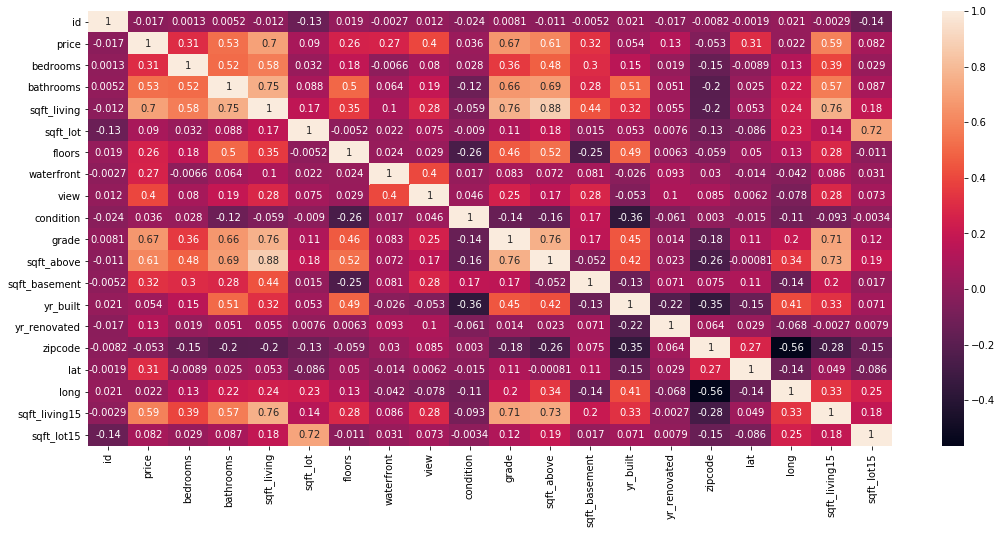

In [0]:
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

# Validation Dataset

In [0]:
X = df.iloc[:, 3:21].values
y = df["price"].values

#split the data into test and training set, We will use 70% of the dataset for modeling 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=7)

"""We suspect that the difference in scales of the raw data may be negatively impact on some algorithms. Standardization 
is a useful technique to transform attributes""" 

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [0]:
print(len(X_train),len(X_test), len(y_train), len(y_test)  )

15129 6484 15129 6484


We will select a suite of diﬀerent algorithms capable of working on this regression problem. These include:

1. Linear Algorithms: Linear Regression (LR)
2. Nonlinear Algorithms: Classiﬁcation and Regression Trees (CART), k-Nearest Neighbors (KNN).
3. Bagging Methods: Random Forests (RF)
    
Let’s compare the algorithms. We will display the RMSE and R^2 score for each algorithm as we calculate it and collect the results for later use.

# Linear Regression

In [0]:
Linear_REG= LinearRegression()
Linear_REG.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred = Linear_REG.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

linearReg_score= r2_score(y_test, y_pred)
linearReg_rmse= round(np.sqrt(mse),2)

print("R^2 score:", r2_score(y_test, y_pred))
print("rmse:", round(np.sqrt(mse),2))

R^2 score: 0.6830247868191013
rmse: 204587.63


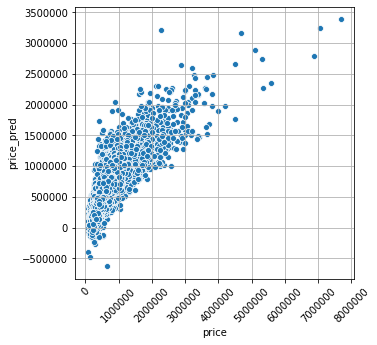

In [0]:
df["price_pred"] =Linear_REG.predict(sc.transform(X))
plt.figure(figsize=(5,5))
sns.scatterplot(df["price"], df["price_pred"])
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# CART

In [0]:
singleTree = DecisionTreeRegressor(random_state=7)
singleTree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=7, splitter='best')

In [0]:
y_pred = singleTree.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

singleTree_score= r2_score(y_test, y_pred)
singleTree_rmse= round(np.sqrt(mse),2)

print("R^2 score:", r2_score(y_test, y_pred))
print("rmse:", round(np.sqrt(mse),2))

R^2 score: 0.6891249372190966
rmse: 202609.43


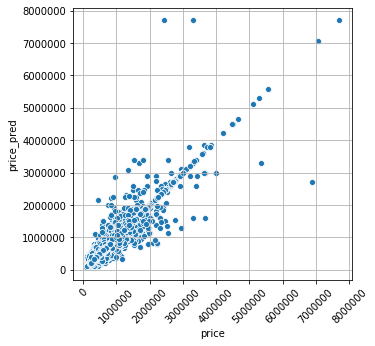

In [0]:
df["price_pred"] =singleTree.predict(sc.transform(X))
plt.figure(figsize=(5,5))
sns.scatterplot(df["price"], df["price_pred"])
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# KNN

In [0]:
neighbour= KNeighborsRegressor()
neighbour.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [0]:
y_pred = neighbour.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

neighbour_score= r2_score(y_test, y_pred)
neighbour_rmse= round(np.sqrt(mse),2)

print("R^2 score:", r2_score(y_test, y_pred))
print("rmse:", round(np.sqrt(mse),2))

R^2 score: 0.7758301727780517
rmse: 172050.24


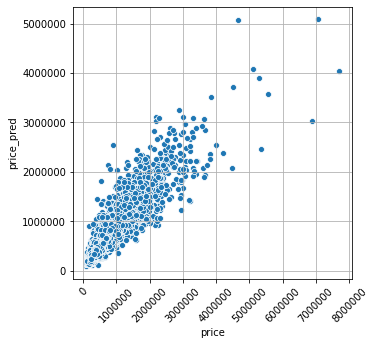

In [0]:
df["price_pred"] =neighbour.predict(sc.transform(X))
plt.figure(figsize=(5,5))
sns.scatterplot(df["price"], df["price_pred"])
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# RandomForest

In [0]:
multipleTree = RandomForestRegressor(n_estimators = 10, random_state = 7)
multipleTree.fit(X_train,y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=7, verbose=0, warm_start=False)

In [0]:
y_pred = multipleTree.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

multipleTree_score= r2_score(y_test, y_pred)
multipleTree_rmse= round(np.sqrt(mse),2)

print("R^2 score:", r2_score(y_test, y_pred))
print("rmse:", round(np.sqrt(mse),2))

R^2 score: 0.8570355275422703
rmse: 137398.12


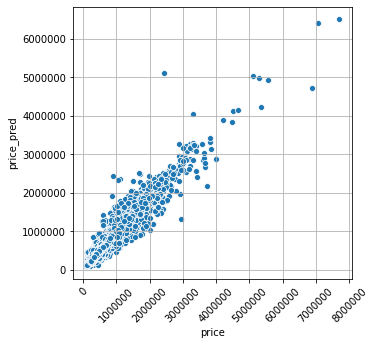

In [0]:
df["price_pred"] =multipleTree.predict(sc.transform(X))
plt.figure(figsize=(5,5))
sns.scatterplot(df["price"], df["price_pred"])
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [0]:
dict = {'Models': ['LR', 'CART', 'KNN', 'RFOREST'],
        'R^2 score': [linearReg_score, singleTree_score, neighbour_score, multipleTree_score ],
        'RMSE': [linearReg_rmse, singleTree_rmse, neighbour_rmse, multipleTree_rmse ]    }
result = pd.DataFrame(dict)
result = result.sort_values(by = 'RMSE')
result.reset_index(inplace=True, drop=True)
result

,Models,R^2 score,RMSE
0,RFOREST,0.857036,137398.12
1,KNN,0.775830,172050.24
2,CART,0.689125,202609.43
3,LR,0.683025,204587.63


In conclution, We found Random forest has lowest RMSE and highest R^2 score when predicting a price for a house than other algorithms, but RMSE is still high for Random forest. It could be greatly improved by feature extraction technique or by tuning and using other algorithms. 
We can also see that, R squared coefficient for Random forest: 85.7%. This means that our model is able to explain 85.7% of the variability in house prices.